https://mp.weixin.qq.com/s/ypqwGjNbOUjaLPIOegLh0Q

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_set = pd.read_csv("../../dataset/raw/TestSet.csv")
train_set = pd.read_csv("../../dataset/raw/TrainingSet.csv")
test_subset = pd.read_csv("../../dataset/raw/TestSubset.csv")
train_subset = pd.read_csv("../../dataset/raw/TrainingSubset.csv")

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258588 entries, 0 to 258587
Data columns (total 28 columns):
EbayID                     258588 non-null int64
QuantitySold               258588 non-null int64
Price                      258588 non-null float64
PricePercent               258588 non-null float64
StartingBidPercent         258588 non-null float64
SellerName                 258588 non-null object
SellerClosePercent         258588 non-null float64
Category                   258588 non-null int64
PersonID                   258588 non-null int64
StartingBid                258588 non-null float64
AvgPrice                   258588 non-null float64
EndDay                     258588 non-null object
HitCount                   258588 non-null int64
AuctionAvgHitCount         258588 non-null int64
ItemAuctionSellPercent     258588 non-null int64
SellerSaleAvgPriceRatio    258588 non-null float64
SellerAvg                  258588 non-null float64
SellerItemAvg              258588 non-

In [4]:
train_data = train_set.drop(['EbayID','QuantitySold','SellerName'],axis = 1)
train_target = train_set['QuantitySold']
# Gets the total number of features
n_trainSamples, n_features = train_data.shape

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


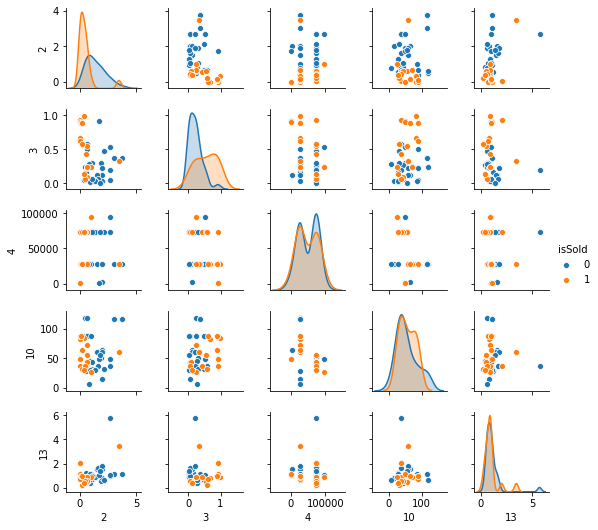

In [7]:
df = pd.DataFrame(np.column_stack((train_data,train_target)),columns=list(range(n_features))+['isSold'])
sns.pairplot(df[:50],vars=[2,3,4,10,13],hue='isSold',size=1.5)

In [8]:
train = train_set.drop(['EbayID','SellerName'],axis = 1)
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [9]:
corr = train.corr()

In [11]:
mask = np.zeros_like(corr,dtype=np.bool)

In [13]:
mask[np.triu_indices_from(mask)] = True

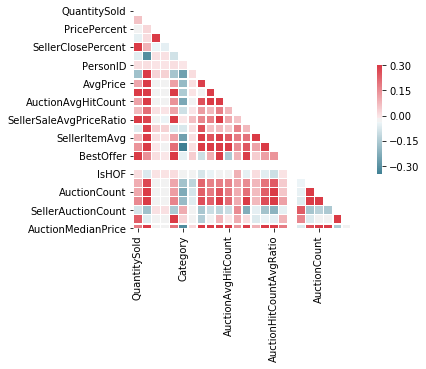

In [15]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = .3,
            square = True, xticklabels = 5, yticklabels = 2,
            linewidths = .5, cbar_kws = {'shrink':.5})
plt.yticks(rotation = 0)
plt.show()

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


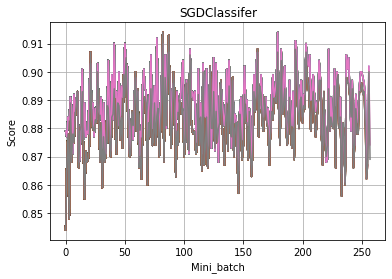

In [24]:
def plot_learning(clf,title):
    plt.figure()
    # 记录验证集得分
    validationScore = []
    # 记录训练集得分
    trainScore = []
    # mini_batch
    mini_batch = 1000
    for i in range(int(np.ceil(n_trainSamples / mini_batch))):
        x_batch = train_data[i * mini_batch:min((i + 1)*mini_batch,n_trainSamples)]
        y_batch = train_target[i * mini_batch: min((i + 1) * mini_batch, n_trainSamples)]
        if i > 0:
            validationScore.append(clf.score(x_batch,y_batch))
        clf.partial_fit(x_batch,y_batch,classes=range(5))
        if i > 0:
            trainScore.append(clf.score(x_batch,y_batch))
        plt.plot(trainScore,label='train_score')
        plt.plot(validationScore,label='validation_score')
        plt.xlabel('Mini_batch')
        plt.ylabel('Score')
        plt.grid()
        plt.title(title)
        plt.savefig('../../dataset/test.jpg')

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.drop(['EndDay'], axis = 1))
clf = SGDClassifier(penalty='l2',alpha=0.001)
plot_learning(clf,'SGDClassifer')

In [25]:
from sklearn import manifold,decomposition,random_projection
from matplotlib import offsetbox
from time import time

In [26]:
images = []
images.append([
    [0., 0., 5., 13., 9., 1., 0., 0.],
    [0., 0., 13., 15., 10., 15., 5., 0.],
    [0., 3., 15., 2., 0., 11., 8., 0.],
    [0., 4., 12., 0., 0., 8., 8., 0.],
    [0., 5., 8., 0., 0., 9., 8., 0.],
    [0., 4., 11., 0., 1., 12., 7., 0.],
    [0., 2., 14., 5., 10., 12., 0., 0.],
    [0., 0., 6., 13., 10., 0., 0., 0.]
])
images.append([
    [0., 0., 0., 12., 13., 5., 0., 0.],
    [0., 0., 0., 11., 16., 9., 0., 0.],
    [0., 0., 3., 15., 16., 6., 0., 0.],
    [0., 7., 15., 16., 16., 2., 0., 0.],
    [0., 0., 1., 16., 16., 3., 0., 0.],
    [0., 0., 1., 16., 16., 6., 0., 0.],
    [0., 0., 1., 16., 16., 6., 0., 0.],
    [0., 0., 0., 11., 16., 10., 0., 0.]
])

In [ ]:
# 1000 pieces of data were selected for visual display
show_instances = 1000
# define the drawing function
def plot_embedding(X,title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(train_target[i]),color = plt.cm.Set1(train_target[i] / 2.),fontdict = {'weight':'bold','size':9})
    if hasattr(offsetbox,"AnnotationBox"):
        show_images = np.array([1.,1.])
    